In [1]:
#importing the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#getting the location of the csv
df=pd.read_csv("/content/drive/MyDrive/Colab resources/predictive analysis/r_train.csv")


# Preprocessing of data


In [3]:
#seeing the columns and data
df.head()


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
#our target var should least affected by the value of data
df.drop(['Id'],axis=1,inplace=True)

In [5]:
#Encoding the dates in the month
df['Open Date']=pd.to_datetime(df["Open Date"])
df['day']=df['Open Date'].dt.day
df['month']=df['Open Date'].dt.month
df['year']=df['Open Date'].dt.year
df.drop(['Open Date'],axis=1,inplace=True)
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P32,P33,P34,P35,P36,P37,revenue,day,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,4,5,5,4,3,4,5653753.0,17,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,6923131.0,14,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,2055379.0,9,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,10,6,18,12,12,6,2675511.0,2,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3,2,3,4,3,3,4316715.0,9,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,0,0,0,0,0,0,5787594.0,25,6,2008
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,9262754.0,12,10,2006
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,0,0,0,0,0,0,2544857.0,8,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,...,0,0,0,0,0,0,7217634.0,29,10,2010


In [6]:
#doing label encoding for the categorical type of column
for i in df.columns:
  if df[i].dtype=='object':
    df[i]=LabelEncoder().fit_transform(df[i].values.reshape(-1, 1)).ravel()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#finding the best features using correlation
correlation_best=df.corr()['revenue'].sort_values(ascending=False).drop(['revenue'])
best=correlation_best.index[:11]
correlation_matrix = df[best].corr()
for feature in best:
    correlation_value = correlation_best[feature]
    print(f"{feature}: {correlation_value:.2f}")


City: 0.27
P2: 0.19
P28: 0.16
P6: 0.14
P21: 0.10
P11: 0.08
P22: 0.08
P1: 0.07
P17: 0.07
P7: 0.05
P23: 0.05


In [8]:
#these var have the most postive and negative wrt the target var revenue
best=['City', 'P2', 'P28', 'P6', 'P21', 'P11', 'P22','P1', 'P17','P10', 'P8', 'Type', 'P13',
       'P29', 'City Group', 'year']
bf=df[best]

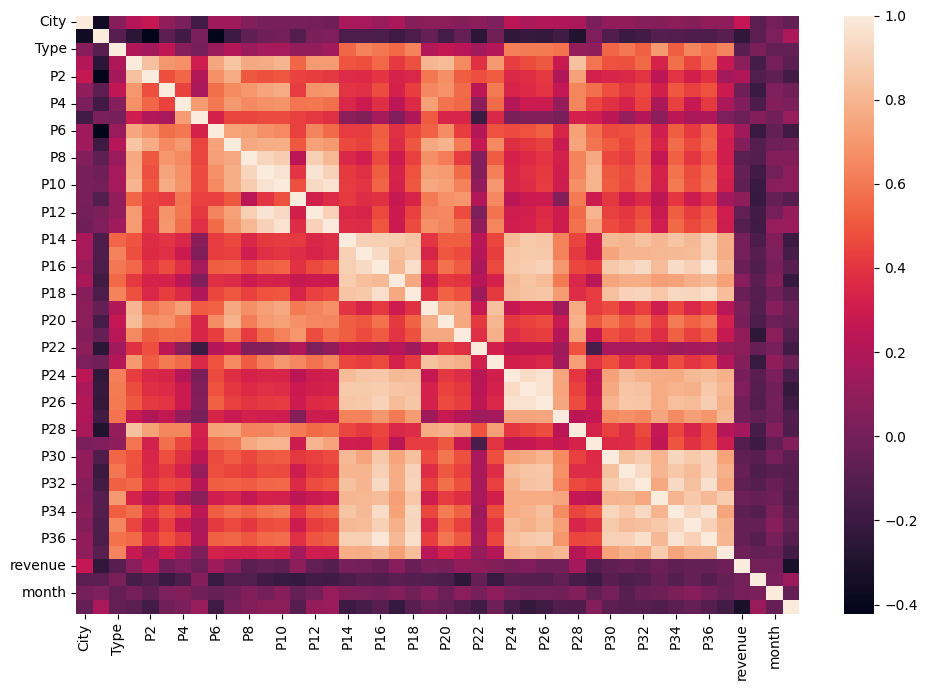

In [9]:
# the below map shows that revenue var no strong correlation with any of the given var
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())
plt.tight_layout()

In [10]:

# Separating the target column ('SalePrice')
Y_data = df['revenue']
X_data = df.drop(columns=['revenue'])



# Scaling the features using StandardScaler
S=X_data.drop(['month','day','City','City Group','Type','year'],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(S)

# Define random seed
random_seed = 42

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y_data,
    shuffle=True,
    random_state=random_seed,
    train_size=0.7,
    test_size=0.3
)

In [11]:
#applying the relevant models
models = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=7),
    RandomForestRegressor()
        ]
for model in models:
  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
  train_mse, train_mae, train_r2 = mean_squared_error(y_train, train_pred), mean_absolute_error(y_train, train_pred), r2_score(y_train, train_pred)
  test_mse, test_mae, test_r2 = mean_squared_error(y_test, test_pred), mean_absolute_error(y_test, test_pred), r2_score(y_test, test_pred)
  model_name = type(model).__name__
  print(f"Model Name: {model_name}")
  print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
  print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
  print(f"Train R2: {train_r2}, Test R2: {test_r2}")


Model Name: LinearRegression
Train MSE: 2466660229418.65, Test MSE: 18450685685970.062
Train MAE: 1140974.8019207343, Test MAE: 3019733.974427712
Train R2: 0.544324605874438, Test R2: -1.0139790798050043
Model Name: DecisionTreeRegressor
Train MSE: 418872794893.3471, Test MSE: 9438193690628.266
Train MAE: 464611.386145987, Test MAE: 1905804.3458082434
Train R2: 0.9226200578316023, Test R2: -0.03022321054045607
Model Name: RandomForestRegressor
Train MSE: 901170508129.4165, Test MSE: 7927948210838.542
Train MAE: 576936.2004210526, Test MAE: 1605881.1616666669
Train R2: 0.8335233926551019, Test R2: 0.13462718328417111


Dropping out columns that probabaly wont effect the data.

In [12]:
#trying to predict for the test data itself
sf=pd.read_csv('/content/drive/MyDrive/Colab resources/predictive analysis/r_test.csv')


In [13]:
#preprocessing the test data
sf.drop(['Id'],axis=1,inplace=True)
#doing date encoding
sf['Open Date']=pd.to_datetime(sf["Open Date"])
sf['day']=sf['Open Date'].dt.day
sf['month']=sf['Open Date'].dt.month
sf['year']=sf['Open Date'].dt.year
sf.drop(['Open Date'],axis=1,inplace=True)
#if categorical var doing label encoding
for i in sf.columns:
  if sf[i].dtype=='object':
    sf[i]=LabelEncoder().fit_transform(sf[i].values.reshape(-1, 1)).ravel()
sf.drop(['month','day','City','City Group','Type','year',],axis=1,inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#applying random forest tree on test data set
sf=scaler.fit_transform(sf)
results=models[2].predict(sf)
results=pd.DataFrame(results,columns=['Result'])

In [15]:
results

,Result
0,4897199.24
1,3553825.85
2,4269379.68
3,4082050.88
4,5543438.72
...,...
99995,3821422.50
99996,2483775.68
99997,4120137.70
99998,4559851.68


In [16]:
results.to_csv('/content/drive/MyDrive/Colab resources/predictive analysis/r_results.csv',index=True)

In [17]:
#trying to run the model by using the best features alone.
S=bf.drop(['City','City Group','Type','year'],axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(S)

In [18]:
# Define random seed
random_seed = 42

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y_data,
    shuffle=True,
    random_state=random_seed,
    train_size=0.7,
    test_size=0.3
)

In [19]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=7),
    RandomForestRegressor()
        ]
for model in models:
  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
  train_mse, train_mae, train_r2 = mean_squared_error(y_train, train_pred), mean_absolute_error(y_train, train_pred), r2_score(y_train, train_pred)
  test_mse, test_mae, test_r2 = mean_squared_error(y_test, test_pred), mean_absolute_error(y_test, test_pred), r2_score(y_test, test_pred)
  model_name = type(model).__name__
  print(f"Model Name: {model_name}")
  print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
  print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
  print(f"Train R2: {train_r2}, Test R2: {test_r2}")


Model Name: LinearRegression
Train MSE: 4451421418330.134, Test MSE: 9106085047347.932
Train MAE: 1510093.6893028596, Test MAE: 1888569.224142765
Train R2: 0.17767222861714815, Test R2: 0.006028009125467748
Model Name: DecisionTreeRegressor
Train MSE: 541291498699.41144, Test MSE: 10044851934666.346
Train MAE: 506989.1579767601, Test MAE: 2004300.4761183262
Train R2: 0.9000051916088977, Test R2: -0.09644280979431952
Model Name: RandomForestRegressor
Train MSE: 797025204581.0791, Test MSE: 7970964497623.761
Train MAE: 537769.6384210525, Test MAE: 1605011.317142857
Train R2: 0.852762545123174, Test R2: 0.12993175336081608
